In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [6]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


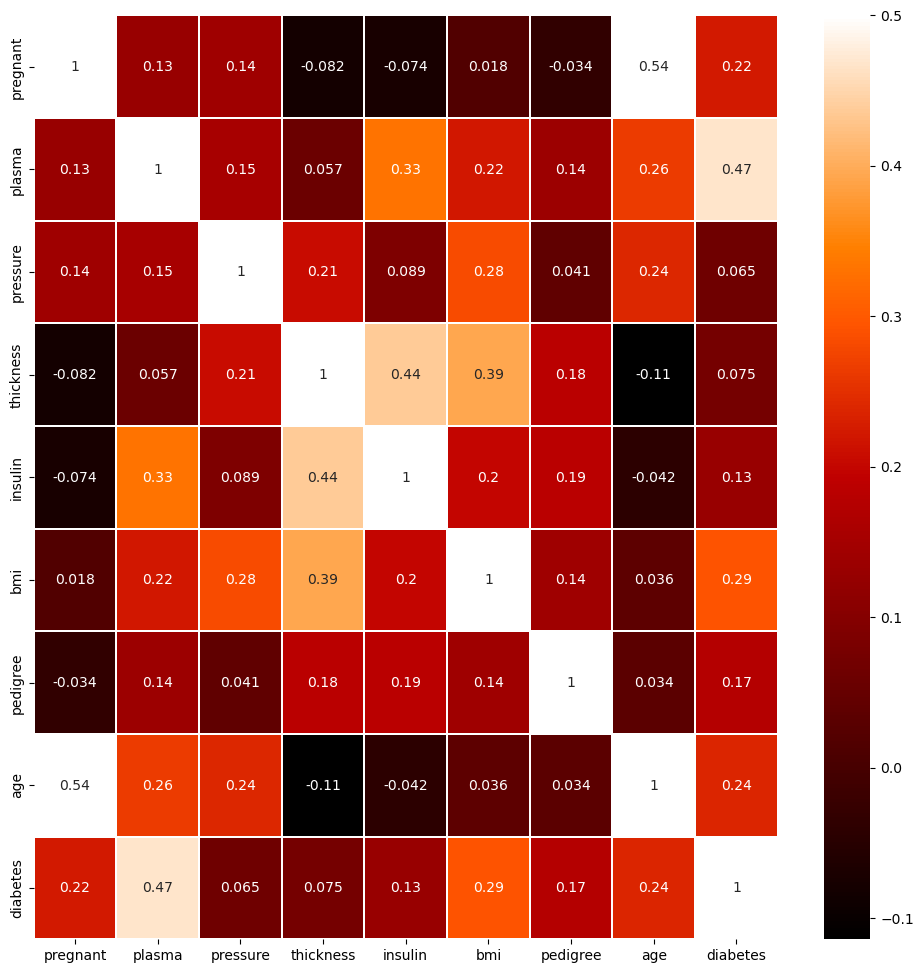

In [7]:
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

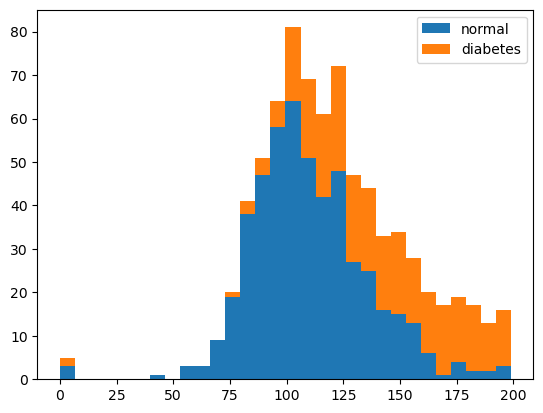

In [8]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

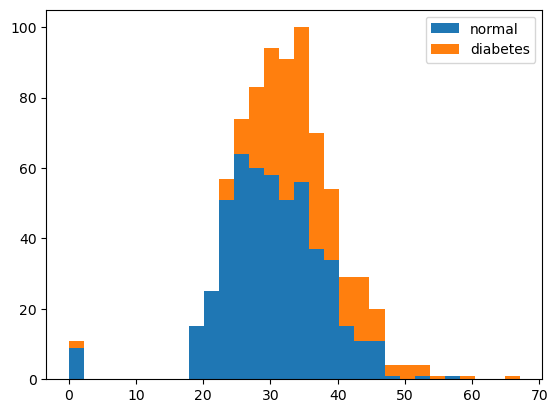

In [9]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

In [10]:
from tensorflow import keras

In [11]:
# data = df.values
X = df.iloc[:, :8]
y = df.iloc[:,8]

In [12]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [13]:
model = keras.Sequential() 
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(12, activation='relu')) 
model.add(keras.layers.Dense(8, activation='relu')) 
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 2.1232 - accuracy: 0.5911
Epoch 2/100
154/154 [==============================] - 0s 978us/step - loss: 1.3012 - accuracy: 0.6172
Epoch 3/100
154/154 [==============================] - 0s 953us/step - loss: 1.1283 - accuracy: 0.6146
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.9559 - accuracy: 0.6549
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8403 - accuracy: 0.6536
Epoch 6/100
154/154 [==============================] - 0s 984us/step - loss: 0.8156 - accuracy: 0.6641
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7978 - accuracy: 0.6719
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.6940
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6927
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6698 - 